In [1]:
# checking Java installation
!$JAVA_HOME/bin/java -version
!echo $JAVA_HOME
!export PATH=$JAVA_HOME/bin:$PATH
!echo $PATH
!java -version

/bin/bash: line 1: /bin/java: No such file or directory



/home/kolim/Projects/pytetrad_plus/.venv/bin:/usr/local/bin:/usr/bin:/bin:/usr/local/games:/usr/games
/bin/bash: line 1: java: command not found


In [2]:
# Jpype1 for interacting with tetrad with python
!pip install JPype1
# pytetrad package
!pip install git+https://github.com/cmu-phil/py-tetrad
# extras to add to pytetrad to support use in jupyter notebooks and processing
!pip install pytetrad_plus

  Cloning https://github.com/cmu-phil/py-tetrad to /tmp/pip-req-build-v3jks4n8
  Running command git clone --filter=blob:none --quiet https://github.com/cmu-phil/py-tetrad /tmp/pip-req-build-v3jks4n8
  Resolved https://github.com/cmu-phil/py-tetrad to commit 2bfb37cc1ea53a398a95e8bd3f368948570646df
  Preparing metadata (setup.py) ... done


In [4]:
!pip install dgraph_flex



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


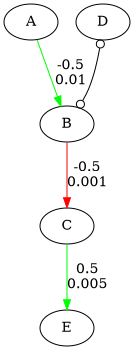

In [5]:
from dgraph_flex import DgraphFlex

obj = DgraphFlex()
# add edges to graph object
obj.add_edge('A', '-->', 'B', color='green', strength=-0.5, pvalue=0.01)
obj.add_edge('B', '-->', 'C', color='red', strength=-.5, pvalue=0.001)
obj.add_edge('C', '-->', 'E', color='green', strength=0.5, pvalue=0.005)
obj.add_edge('D', 'o-o', 'B')
# load into graphviz object and render to window
obj.show_graph()


Run an analysis on my own data. I need to be able to access the data.


In [6]:
# get line counts
!wc  pytetrad_plus/boston_data_raw.csv
!wc  pytetrad_plus/boston_data.csv

  642   642 30641 pytetrad_plus/boston_data_raw.csv


   622    622 166889 pytetrad_plus/boston_data.csv


In [6]:
# read data

from pytetrad_plus import MyTetradSearch
import pprint

ts = MyTetradSearch()

# read data
df = ts.read_csv(f'HINF5660 2025 extra credit data.csv')

df

,V3,V2,V1,Y,V6,X,Z,V8,A,B
0,8.664572,3.814074,-1.940943,2.021112,-0.312353,2.102669,1.855167,0.544582,7.145446,7.227991
1,9.775891,2.403630,1.272587,0.425088,0.969035,4.529575,3.560956,1.759685,6.037929,5.774928
2,9.164975,3.388250,1.422488,1.935278,0.219630,0.684954,0.435031,0.859976,6.277137,7.494771
3,9.201432,3.843721,-0.742163,2.076599,1.211959,2.212968,1.510550,1.706644,7.652403,6.189962
4,11.570124,4.566536,1.773819,0.923744,0.281393,0.904513,2.324837,-0.425178,3.680821,5.886430
...,...,...,...,...,...,...,...,...,...,...
995,9.711738,2.691686,0.841387,-0.811759,-0.032159,1.782397,1.218257,-1.371884,8.761448,6.648111
996,11.613526,5.181700,1.908678,-1.119759,0.592012,1.710866,3.608142,0.899682,6.680745,7.031204
997,11.286783,3.897429,1.044914,1.713174,-0.189947,1.415068,0.724415,2.370094,4.026501,7.953272
998,10.320962,3.698207,1.757196,2.274301,-0.381216,2.113038,1.151963,1.212954,8.046421,7.789878


In [7]:


searchResult = ts.run_model_search(df, model='gfci',
                                                    #knowledge=knowledge,
                                                    score={'sem_bic': {'penalty_discount': 1.0}},
                                                    test={'fisher_z': {'alpha': .05}})

edges = list(searchResult['setEdges'])
pprint.pprint(edges)

['Z o-o V3',
 'A o-> V8',
 'Z o-o X',
 'V1 --> V6',
 'V3 o-> V1',
 'V6 --> V8',
 'V2 o-> V1']


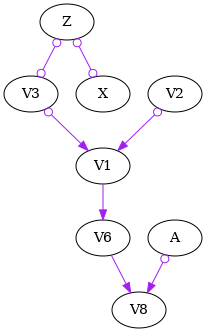

In [8]:
from dgraph_flex import DgraphFlex
# create graph output
obj = DgraphFlex()
# add edges to graph object
for edge in edges:
  source,edge_type, target = edge.split(' ')
  obj.add_edge(source,edge_type, target, color='purple')

obj.show_graph()

In [10]:
# run the sem
import semopy

lavaan_model = ts.edges_to_lavaan(searchResult['setEdges'])
    
# run semopy
sem_results = ts.run_semopy(lavaan_model, df)
    
# plot into png
png_path = 'extra_credit.png'
g = semopy.semplot(sem_results['model'], png_path,  plot_covs = True)
